In [10]:
#!pip install imblearn
#!pip install xgboost

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import imblearn
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [12]:
train_data = pd.read_csv('/Users/nusranazar/Desktop/Study Stuff/FALL 24/3920 Project/genomic-data-analysis/data/train.csv')

Train Data

In [13]:
train_data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [15]:
# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]

In [16]:
train_data = train_data.rename(columns={
    'Genes_in_mothers_side': 'Genes_Mothers_Side',
    'Inherited_from_father': 'Inherited_Father',
    'Blood_cell_count_(mcL)': 'Blood_Cell_mcL',
    'Respiratory_Rate_(breaths/min)': 'Respiratory_Rate_breaths_min',
    'Heart_Rate_(rates/min': 'Heart_Rates_Min',
    'Follow-up': 'Follow_up',
    'Autopsy_shows_birth_defect_(if_applicable)': 'Autopsy_Birth_Defect',
    'Folic_acid_details_(peri-conceptional)': 'Folic_Acid',
    'H/O_serious_maternal_illness': 'Maternal_Illness',
    'H/O_radiation_exposure_(x-ray)': 'Radiation_Exposure',
    'H/O_substance_abuse': 'Substance_Abuse',
    'Assisted_conception_IVF/ART': 'Assisted_Conception',
    'History_of_anomalies_in_previous_pregnancies': 'History_Previous_Pregnancies',
    'No._of_previous_abortion': 'Previous_Abortion',
    'Birth_defects': 'Birth_Defects',
    'White_Blood_cell_count_(thousand_per_microliter)': 'White_Blood_Cell',
})

In [17]:
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Fathers_name', 'Mothers_age',
       'Fathers_age', 'Institute_Name', 'Location_of_Institute', 'Status',
       'Respiratory_Rate_breaths_min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Place_of_birth',
       'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

If Genetic_Disorder is NaN, removing those rows

In [18]:
# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)

# Reset the index to update row numbers and avoid keeping the old index
train_data.reset_index(drop=True, inplace=True)

In [19]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Id                    19937 non-null  object 
 1   Patient_Age                   18712 non-null  float64
 2   Genes_Mothers_Side            19937 non-null  object 
 3   Inherited_Father              19676 non-null  object 
 4   Maternal_gene                 17513 non-null  object 
 5   Paternal_gene                 19937 non-null  object 
 6   Blood_Cell_mcL                19937 non-null  float64
 7   Patient_First_Name            19937 non-null  object 
 8   Family_Name                   11587 non-null  object 
 9   Fathers_name                  19937 non-null  object 
 10  Mothers_age                   14733 non-null  float64
 11  Fathers_age                   14772 non-null  float64
 12  Institute_Name                15515 non-null  object 
 13  L

In [45]:
train_data = train_data.drop(columns=['Patient_Id'])

In [46]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,19937.0,6.975423,4.182388,0.00000,3.000000,7.000000,10.000000,14.000000
Blood_Cell_mcL,19937.0,4.899020,0.199268,4.14623,4.763531,4.899875,5.033669,5.609829
Mothers_age,19937.0,31.539399,9.862379,18.00000,23.000000,28.000000,40.000000,51.000000
Fathers_age,19937.0,36.287656,14.788994,20.00000,20.000000,34.000000,49.000000,64.000000
Test_1,18119.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Test_2,18093.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Test_3,18115.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Test_4,18089.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Test_5,18061.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Previous_Abortion,19937.0,1.999699,1.345136,0.00000,1.000000,2.000000,3.000000,4.000000


In [48]:
train_data.isnull().sum()

Patient_Age                        0
Genes_Mothers_Side                 0
Inherited_Father                   0
Maternal_gene                      0
Paternal_gene                      0
Blood_Cell_mcL                     0
Patient_First_Name                 0
Family_Name                     8350
Fathers_name                       0
Mothers_age                        0
Fathers_age                        0
Institute_Name                  4422
Location_of_Institute              0
Status                             0
Respiratory_Rate_breaths_min       0
Heart_Rates_Min                    0
Test_1                          1818
Test_2                          1844
Test_3                          1822
Test_4                          1848
Test_5                          1876
Parental_consent                   0
Follow_up                          0
Gender                             0
Birth_asphyxia                     0
Autopsy_Birth_Defect               0
Place_of_birth                  1820
F

In [49]:
train_data.columns

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Fathers_name', 'Mothers_age',
       'Fathers_age', 'Institute_Name', 'Location_of_Institute', 'Status',
       'Respiratory_Rate_breaths_min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Place_of_birth',
       'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [50]:
print(train_data["Genes_Mothers_Side"].value_counts())

Genes_Mothers_Side
Yes    11848
No      8089
Name: count, dtype: int64


In [51]:
print(train_data['Genetic_Disorder'].value_counts())

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


In [52]:
def get_unique(train_data):
    for i in train_data.columns:
        print(f'{i} - > {len(train_data[i].unique())}')
get_unique(train_data)

Patient_Age - > 15
Genes_Mothers_Side - > 2
Inherited_Father - > 2
Maternal_gene - > 2
Paternal_gene - > 2
Blood_Cell_mcL - > 19937
Patient_First_Name - > 2430
Family_Name - > 5982
Fathers_name - > 15190
Mothers_age - > 34
Fathers_age - > 45
Institute_Name - > 28
Location_of_Institute - > 26
Status - > 2
Respiratory_Rate_breaths_min - > 2
Heart_Rates_Min - > 2
Test_1 - > 2
Test_2 - > 2
Test_3 - > 2
Test_4 - > 2
Test_5 - > 2
Parental_consent - > 1
Follow_up - > 2
Gender - > 3
Birth_asphyxia - > 4
Autopsy_Birth_Defect - > 3
Place_of_birth - > 3
Folic_Acid - > 2
Maternal_Illness - > 2
Radiation_Exposure - > 4
Substance_Abuse - > 4
Assisted_Conception - > 2
History_Previous_Pregnancies - > 2
Previous_Abortion - > 5
Birth_Defects - > 2
White_Blood_Cell - > 15682
Blood_test_result - > 4
Symptom_1 - > 3
Symptom_2 - > 3
Symptom_3 - > 3
Symptom_4 - > 3
Symptom_5 - > 3
Genetic_Disorder - > 3
Disorder_Subclass - > 9


In [53]:
# Continuous features with median imputation
train_data['Patient_Age'].fillna(train_data['Patient_Age'].median(), inplace=True)
train_data['Blood_Cell_mcL'].fillna(train_data['Blood_Cell_mcL'].median(), inplace=True)
train_data['White_Blood_Cell'].fillna(train_data['White_Blood_Cell'].median(), inplace=True)

# Categorical/ordinal features with mode imputation
columns_to_fill_mode = [
    'Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene','Mothers_age',
    'Fathers_age','Status', 'Respiratory_Rate_breaths_min', 'Heart_Rates_Min', 
    'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia','Autopsy_Birth_Defect',  
    'Folic_Acid', 
    'Maternal_Illness', 'Radiation_Exposure', 
    'Substance_Abuse', 'Assisted_Conception', 
    'History_Previous_Pregnancies','Previous_Abortion', 'Birth_Defects', 
    'Blood_test_result', 'Disorder_Subclass'
]

for col in columns_to_fill_mode:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)



In [54]:
train_data.isnull().sum()

Patient_Age                        0
Genes_Mothers_Side                 0
Inherited_Father                   0
Maternal_gene                      0
Paternal_gene                      0
Blood_Cell_mcL                     0
Patient_First_Name                 0
Family_Name                     8350
Fathers_name                       0
Mothers_age                        0
Fathers_age                        0
Institute_Name                  4422
Location_of_Institute              0
Status                             0
Respiratory_Rate_breaths_min       0
Heart_Rates_Min                    0
Test_1                          1818
Test_2                          1844
Test_3                          1822
Test_4                          1848
Test_5                          1876
Parental_consent                   0
Follow_up                          0
Gender                             0
Birth_asphyxia                     0
Autopsy_Birth_Defect               0
Place_of_birth                  1820
F

In [55]:
print("Status: ",train_data["Status"].unique())
print("Respiratory Rate (breaths/min): ",train_data["Respiratory_Rate_breaths_min"].unique())
print("Heart Rate: ",train_data["Heart_Rates_Min"].unique())
print("Follow-up: ",train_data["Follow_up"].unique())
print("Gender: ",train_data["Gender"].unique())
print("Autopsy shows birth defect: ",train_data["Autopsy_Birth_Defect"].unique())
print("Birth defects: ",train_data["Birth_Defects"].unique())
print("Blood test result: ",train_data["Blood_test_result"].unique())
print("Genetic Disorder: ",train_data["Genetic_Disorder"].unique())
print("Disorder Subclass: ",train_data["Disorder_Subclass"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect:  ['Not applicable' 'No' 'Yes']
Birth defects:  ['Multiple' 'Singular']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Diabetes' 'Leigh syndrome'
 'Cancer' 'Cystic fibrosis' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


# EDA

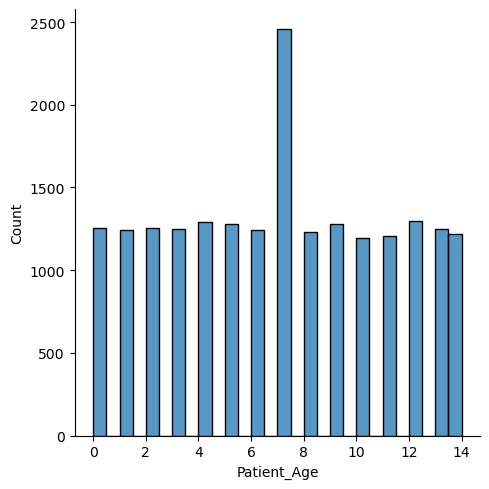

In [56]:
#plt.style.use('seaborn-dark')
sns.displot(x = 'Patient_Age', data = train_data);

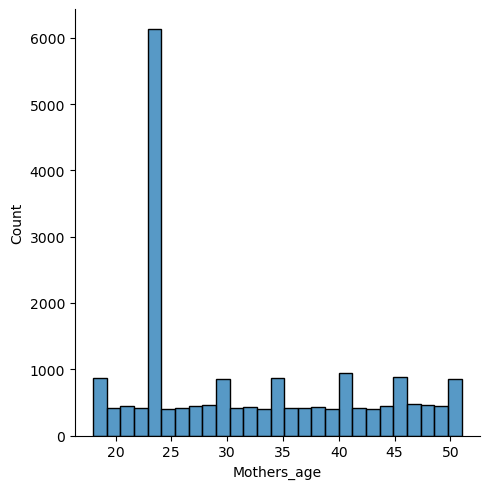

In [57]:
sns.displot(x = 'Mothers_age', data = train_data);

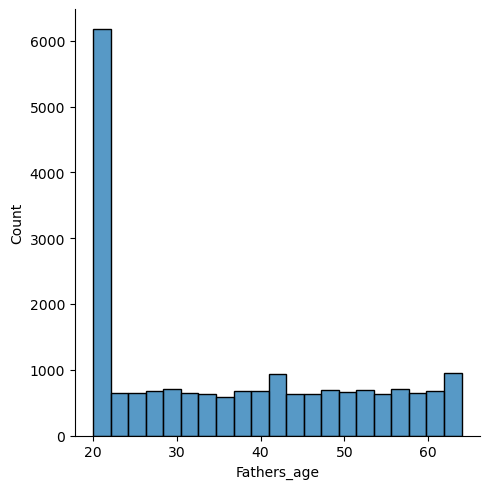

In [58]:
sns.displot(x = 'Fathers_age', data = train_data);

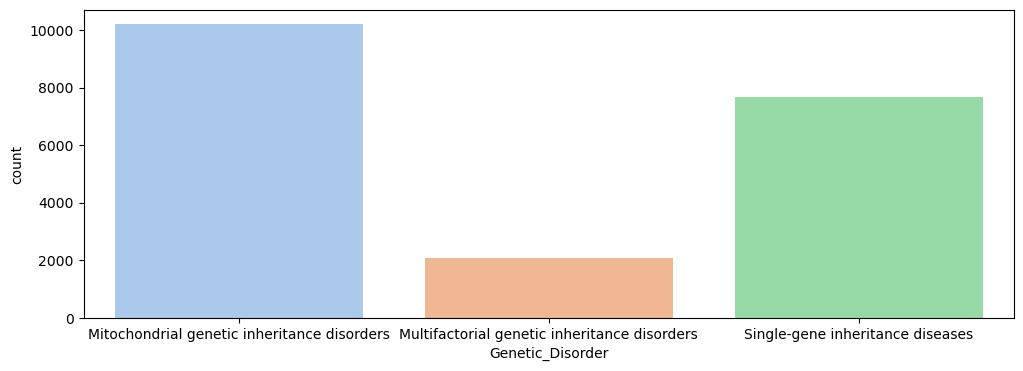

In [59]:

plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = train_data,palette='pastel');

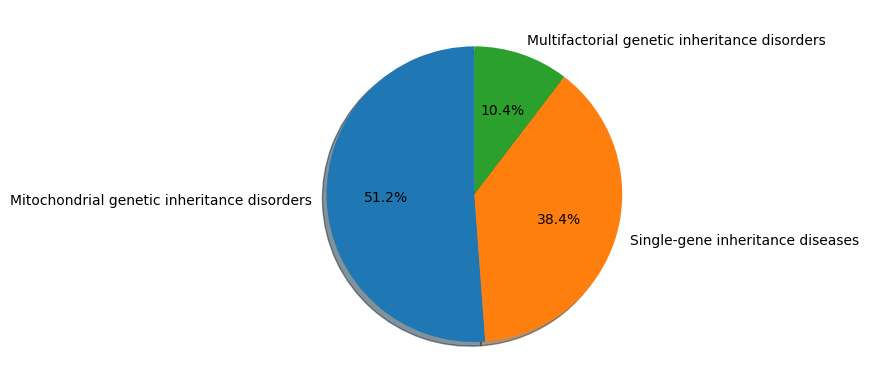

In [60]:
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)


plt.pie(train_data.Genetic_Disorder.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90);

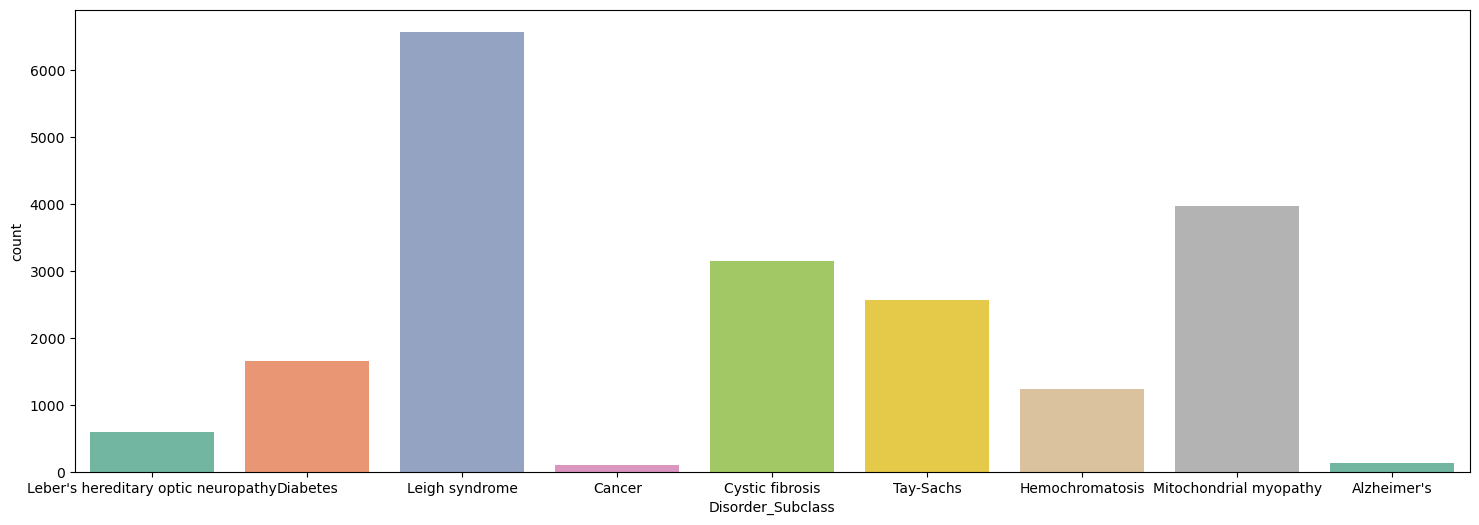

In [61]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = train_data, palette='Set2');

In [62]:
unique_subclasses = train_data.Disorder_Subclass.value_counts()
print(unique_subclasses)

Disorder_Subclass
Leigh syndrome                         6573
Mitochondrial myopathy                 3971
Cystic fibrosis                        3145
Tay-Sachs                              2556
Diabetes                               1653
Hemochromatosis                        1228
Leber's hereditary optic neuropathy     587
Alzheimer's                             133
Cancer                                   91
Name: count, dtype: int64


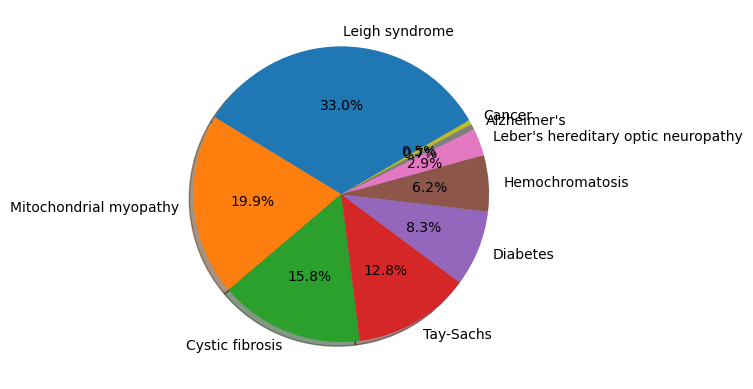

In [63]:

labels2 = ['Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis',
"Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer']

explode2 = (0, 0, 0, 0, 0, 0, 0, 0,0)

plt.pie(train_data.Disorder_Subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

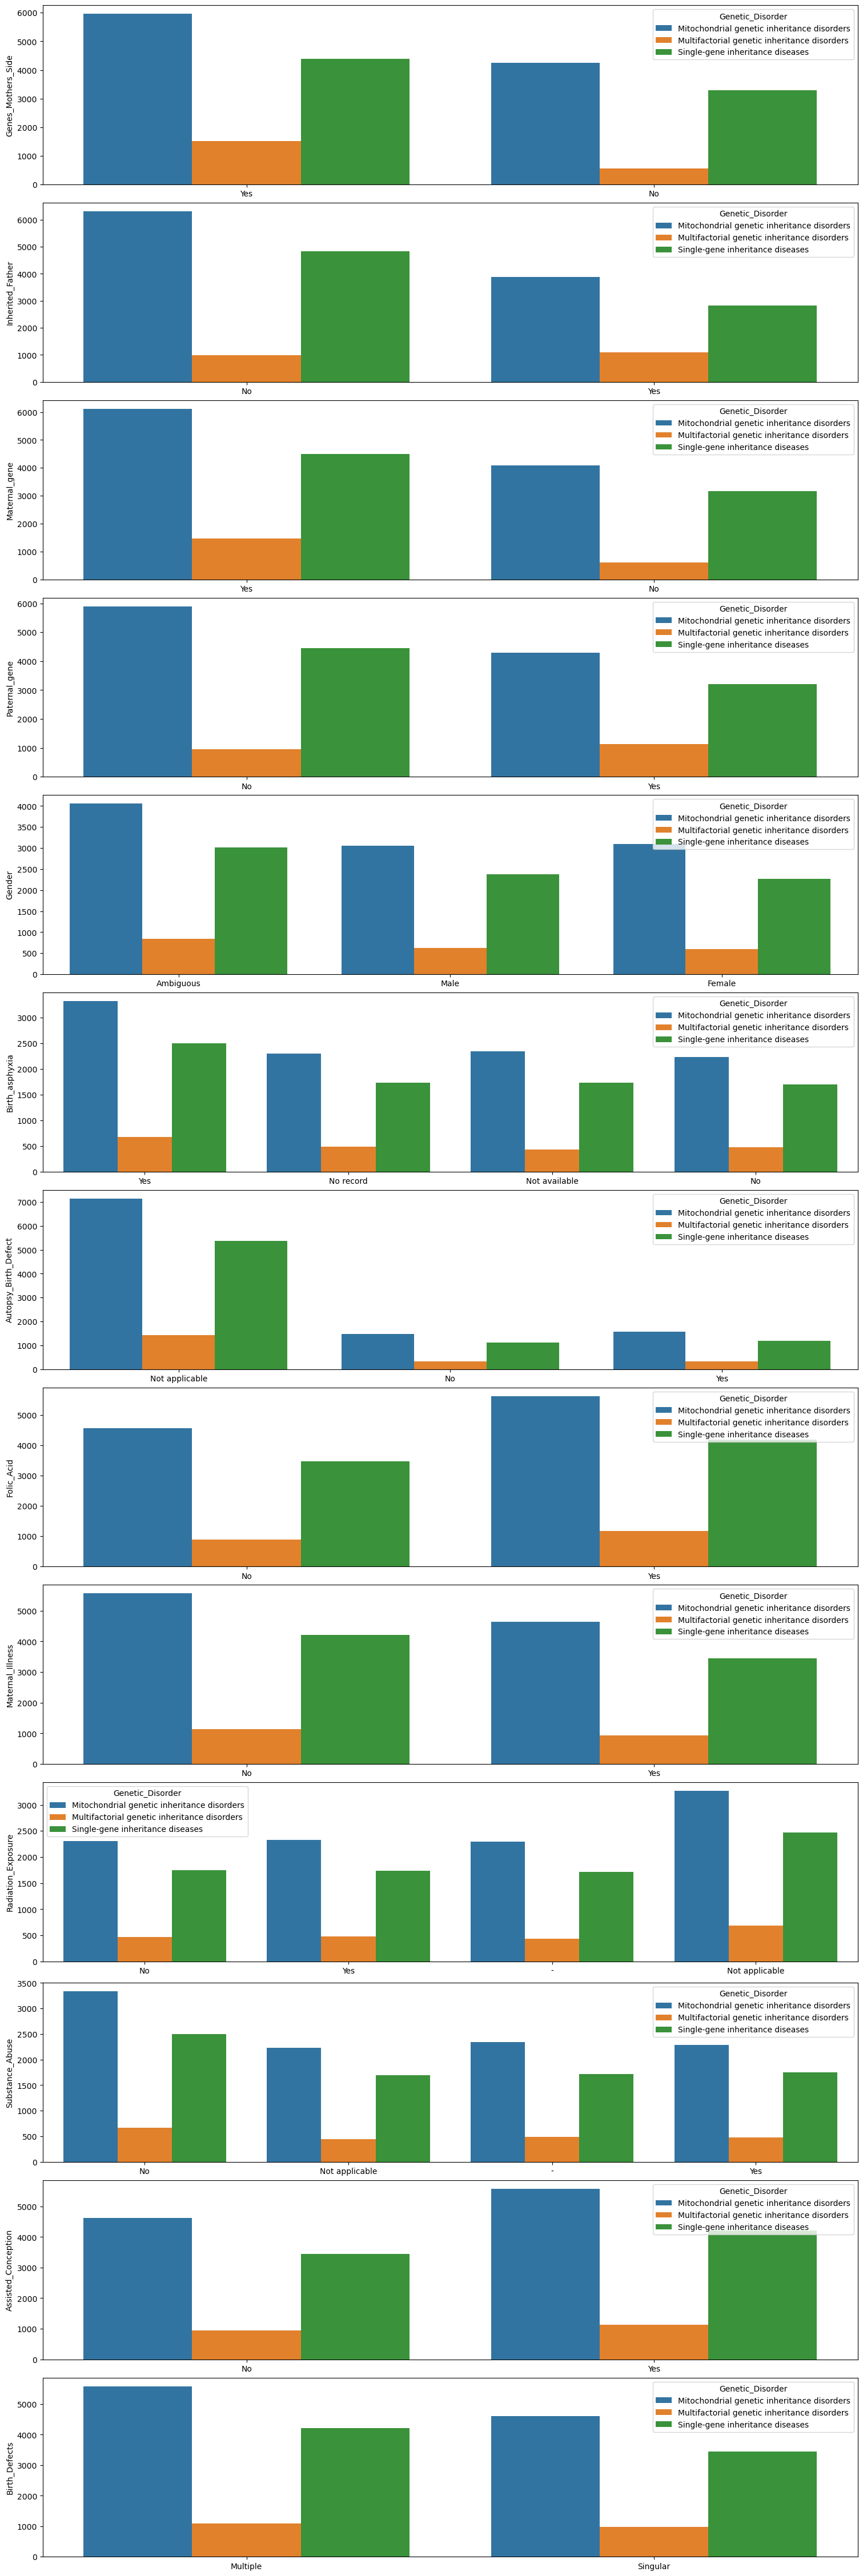

In [64]:
cols  = ['Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene', 
          'Gender', 'Birth_asphyxia', 'Autopsy_Birth_Defect', 
         'Folic_Acid',
        'Maternal_Illness',
         'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception', 'Birth_Defects']


fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train_data, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

Encoding

In [73]:
encode_train_data = train_data.copy()

In [74]:
# Columns to encode
columns_to_encode = [
    "Genes_Mothers_Side", "Inherited_Father", "Maternal_gene", "Paternal_gene", "Status",
    "Respiratory_Rate_breaths_min", "Heart_Rates_Min", "Parental_consent", "Follow_up",
    "Gender", "Birth_asphyxia", "Autopsy_Birth_Defect", "Folic_Acid", "Maternal_Illness",
    "Radiation_Exposure", "Substance_Abuse", "Assisted_Conception", 
    "History_Previous_Pregnancies", "Birth_Defects", "Blood_test_result", 
    "Genetic_Disorder", "Disorder_Subclass"
]

# Dictionary to store mappings for each column
encoding_mappings = {}

# Loop through each column and encode using pd.factorize()
for col in columns_to_encode:
    # Encode the column and get the unique values
    encode_train_data[col], unique_values = pd.factorize(encode_train_data[col])
    
    # Store the mapping of encoded values to original values
    encoding_mappings[col] = {index: value for index, value in enumerate(unique_values)}

# Print each column's encoding mappings one below the other
for col, mapping in encoding_mappings.items():
    print(f"Encoding mapping for '{col}':")
    for encoded_value, original_value in mapping.items():
        print(f"  {encoded_value}: {original_value}")
    print("\n")  # Blank line between columns for readability


Encoding mapping for 'Genes_Mothers_Side':
  0: Yes
  1: No


Encoding mapping for 'Inherited_Father':
  0: No
  1: Yes


Encoding mapping for 'Maternal_gene':
  0: Yes
  1: No


Encoding mapping for 'Paternal_gene':
  0: No
  1: Yes


Encoding mapping for 'Status':
  0: Alive
  1: Deceased


Encoding mapping for 'Respiratory_Rate_breaths_min':
  0: Normal (30-60)
  1: Tachypnea


Encoding mapping for 'Heart_Rates_Min':
  0: Normal
  1: Tachycardia


Encoding mapping for 'Parental_consent':
  0: Yes


Encoding mapping for 'Follow_up':
  0: High
  1: Low


Encoding mapping for 'Gender':
  0: Ambiguous
  1: Male
  2: Female


Encoding mapping for 'Birth_asphyxia':
  0: Yes
  1: No record
  2: Not available
  3: No


Encoding mapping for 'Autopsy_Birth_Defect':
  0: Not applicable
  1: No
  2: Yes


Encoding mapping for 'Folic_Acid':
  0: No
  1: Yes


Encoding mapping for 'Maternal_Illness':
  0: No
  1: Yes


Encoding mapping for 'Radiation_Exposure':
  0: No
  1: Yes
  2: -
  3: Not ap

In [75]:
encode_train_data

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Patient_First_Name,Family_Name,Fathers_name,Mothers_age,...,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,0,0,0,0,4.760603,Richard,NaN,Larre,23.0,...,0,9.857562,0,1.0,1.0,1.0,1.0,1.0,0,0
1,6.0,0,0,1,0,4.893297,Kimberly,NaN,Nashon,41.0,...,1,7.472366,1,0.0,1.0,1.0,1.0,1.0,1,1
2,12.0,0,0,0,0,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,1,7.919321,2,0.0,0.0,1.0,0.0,0.0,0,2
3,11.0,0,0,0,1,4.720703,Johanna,Stutzman,Suave,32.0,...,0,4.098210,0,0.0,0.0,0.0,0.0,NaN,1,3
4,14.0,0,0,0,0,5.103188,Richard,NaN,Coleston,23.0,...,0,10.272230,1,1.0,0.0,0.0,1.0,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,1,1,0,1,5.012599,Edward,Hurst,Quientin,47.0,...,0,12.000000,0,NaN,1.0,0.0,0.0,0.0,0,2
19933,4.0,0,1,0,0,5.258298,Lynn,NaN,Alhassane,35.0,...,0,6.584811,2,0.0,0.0,1.0,0.0,0.0,0,2
19934,8.0,1,1,1,1,4.974220,Matthew,Farley,Dartanion,23.0,...,0,7.041556,2,1.0,1.0,1.0,1.0,0.0,1,1
19935,8.0,0,0,0,0,5.186470,John,NaN,Cavani,35.0,...,1,7.715464,1,0.0,0.0,0.0,1.0,NaN,0,7


Unique values in 'Genetic_Disorder': [0 1 2]


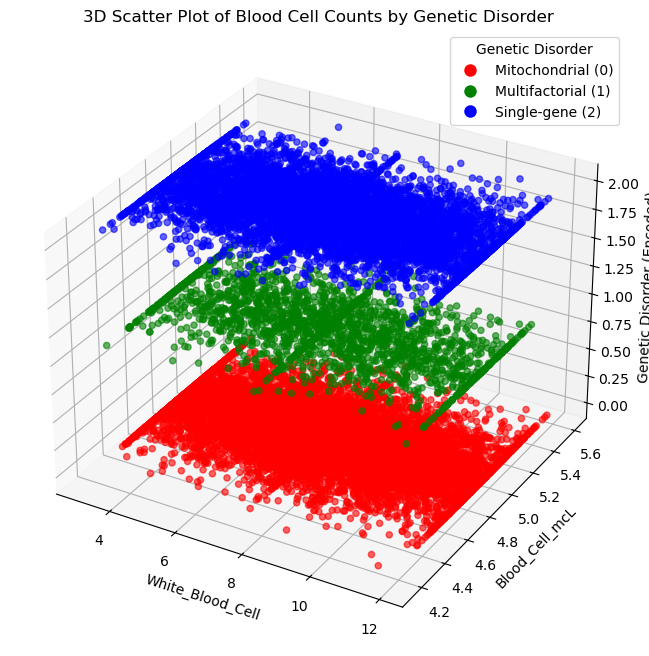

In [76]:
# Check unique values in the 'Genetic_Disorder' column
print("Unique values in 'Genetic_Disorder':", encode_train_data['Genetic_Disorder'].unique())


# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different Genetic_Disorder categories
colors = {0: 'r', 1: 'g', 2: 'b'}

# Create the 3D scatter plot
ax.scatter(
    encode_train_data['White_Blood_Cell'],
    encode_train_data['Blood_Cell_mcL'],
    encode_train_data['Genetic_Disorder'],
    c=encode_train_data['Genetic_Disorder'].map(colors),
    alpha=0.6
)

# Setting labels and title
ax.set_xlabel('White_Blood_Cell')
ax.set_ylabel('Blood_Cell_mcL')
ax.set_zlabel('Genetic Disorder (Encoded)')
ax.set_title('3D Scatter Plot of Blood Cell Counts by Genetic Disorder')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors.values()]
labels = ['Mitochondrial (0)', 'Multifactorial (1)', 'Single-gene (2)']
ax.legend(handles, labels, title='Genetic Disorder')

# Show the plot
plt.show()


In [69]:
#encode_train_data = encode_train_data.astype("float32")

In [70]:
encode_train_data

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Patient_First_Name,Family_Name,Fathers_name,Mothers_age,...,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,0,0,0,0,4.760603,Richard,NaN,Larre,23.0,...,0,9.857562,0,1.0,1.0,1.0,1.0,1.0,0,0
1,6.0,0,0,1,0,4.893297,Kimberly,NaN,Nashon,41.0,...,1,7.472366,1,0.0,1.0,1.0,1.0,1.0,1,1
2,12.0,0,0,0,0,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,1,7.919321,2,0.0,0.0,1.0,0.0,0.0,0,2
3,11.0,0,0,0,1,4.720703,Johanna,Stutzman,Suave,32.0,...,0,4.098210,0,0.0,0.0,0.0,0.0,NaN,1,3
4,14.0,0,0,0,0,5.103188,Richard,NaN,Coleston,23.0,...,0,10.272230,1,1.0,0.0,0.0,1.0,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,1,1,0,1,5.012599,Edward,Hurst,Quientin,47.0,...,0,12.000000,0,NaN,1.0,0.0,0.0,0.0,0,2
19933,4.0,0,1,0,0,5.258298,Lynn,NaN,Alhassane,35.0,...,0,6.584811,2,0.0,0.0,1.0,0.0,0.0,0,2
19934,8.0,1,1,1,1,4.974220,Matthew,Farley,Dartanion,23.0,...,0,7.041556,2,1.0,1.0,1.0,1.0,0.0,1,1
19935,8.0,0,0,0,0,5.186470,John,NaN,Cavani,35.0,...,1,7.715464,1,0.0,0.0,0.0,1.0,NaN,0,7


In [71]:
print("INFO:\n")
encode_train_data.info()

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   19937 non-null  float64
 1   Genes_Mothers_Side            19937 non-null  int64  
 2   Inherited_Father              19937 non-null  int64  
 3   Maternal_gene                 19937 non-null  int64  
 4   Paternal_gene                 19937 non-null  int64  
 5   Blood_Cell_mcL                19937 non-null  float64
 6   Patient_First_Name            19937 non-null  object 
 7   Family_Name                   11587 non-null  object 
 8   Fathers_name                  19937 non-null  object 
 9   Mothers_age                   19937 non-null  float64
 10  Fathers_age                   19937 non-null  float64
 11  Institute_Name                15515 non-null  object 
 12  Location_of_Institute         19937 non-null  object 

In [ ]:
# Assuming 'Genetic Disorder' is the target column with the specified classes
X = encode_train_data.drop(['Genetic_Disorder'], axis=1)  # Drop the target column from features
y = encode_train_data['Genetic_Disorder']  # Set target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for multiclass targets
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_res.value_counts())


In [50]:
y_train_res

0        0
1        0
2        2
3        2
4        1
        ..
24457    2
24458    2
24459    2
24460    2
24461    2
Name: Genetic_Disorder, Length: 24462, dtype: int64

 0: Mitochondrial genetic inheritance disorders
  1: Multifactorial genetic inheritance disorders
  2: Single-gene inheritance diseases

In [51]:

# Convert the SMOTE-resampled target data back into a DataFrame for plotting
y_train_res_df = pd.DataFrame(y_train_res, columns=['Genetic_Disorder'])

In [52]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names
y_train_res_df['Genetic_Disorder'] = y_train_res_df['Genetic_Disorder'].replace(disorder_mapping)


In [53]:
y_train_res_df

,Genetic_Disorder
0,Mitochondrial genetic inheritance disorders
1,Mitochondrial genetic inheritance disorders
2,Single-gene inheritance diseases
3,Single-gene inheritance diseases
4,Multifactorial genetic inheritance disorders
...,...
24457,Single-gene inheritance diseases
24458,Single-gene inheritance diseases
24459,Single-gene inheritance diseases
24460,Single-gene inheritance diseases


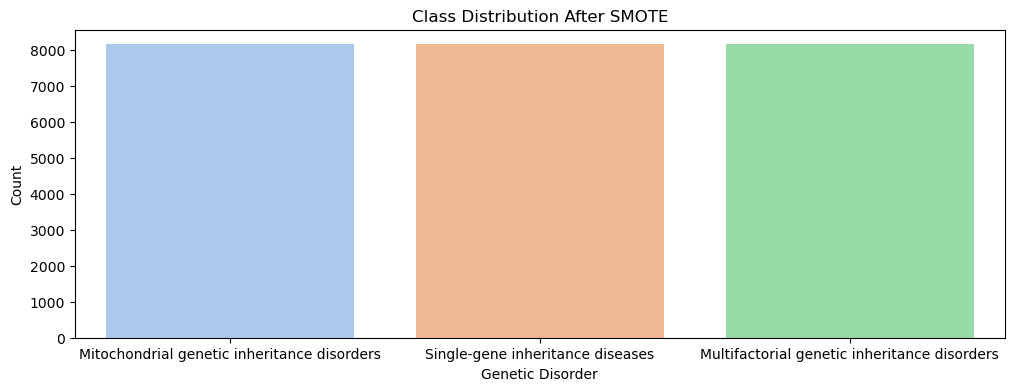

In [54]:
# Plot the balanced class distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='Genetic_Disorder', data=y_train_res_df, palette='pastel')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.show()


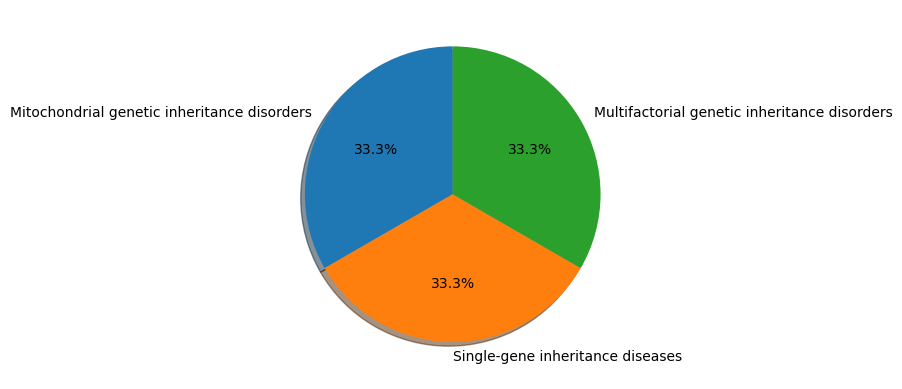

In [55]:
labels_disorder = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode_disorder = (0, 0, 0)


plt.pie(y_train_res_df.Genetic_Disorder.value_counts(), explode=explode_disorder, labels=labels_disorder, autopct='%1.1f%%',
        shadow=True, startangle=90);

In [56]:
X_train_res.columns
#remove disorder subclass

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_test_result', 'Disorder_Subclass'],
      dtype='object')

In [60]:
X_train_res_2 = X_train_res

In [61]:
X_train_res_2

,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Mothers_age,Fathers_age,Status,Respiratory_Rate_breaths_min,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_test_result,Disorder_Subclass
0,13.000000,0,0,0,0,4.855640,22.000000,50.000000,0,0,...,0,2,0,0,0,4.000000,0,12.000000,1,2
1,12.000000,0,1,1,1,5.307853,31.000000,57.000000,0,0,...,0,2,2,1,0,0.000000,1,4.164498,2,2
2,9.000000,0,0,0,1,4.722383,23.000000,24.000000,1,1,...,1,3,1,1,1,0.000000,0,5.447406,1,5
3,7.000000,1,0,0,0,4.899593,43.000000,36.000000,0,1,...,1,0,0,1,0,0.000000,0,7.608308,3,2
4,0.000000,0,0,0,1,4.914728,35.000000,20.000000,1,0,...,1,0,0,1,1,3.000000,1,3.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24457,1.013364,0,1,0,1,5.033837,25.986636,20.000000,0,0,...,0,1,0,0,0,1.000000,0,9.706425,0,4
24458,13.227699,0,1,0,0,4.999089,35.000000,50.544602,1,0,...,1,0,0,1,1,1.772301,0,7.883633,0,4
24459,1.625205,0,0,0,0,4.700490,35.000000,57.749590,1,0,...,1,2,2,0,0,2.000000,0,3.945153,0,4
24460,11.373555,1,0,0,1,4.951826,32.000000,21.879336,0,0,...,0,1,2,0,1,3.252890,0,7.868752,0,5


In [62]:
# Assuming y_train_res is the resampled target variable from SMOTE
X_train_res_2['Genetic_Disorder'] = y_train_res.values

In [63]:
X_train_res_df = pd.DataFrame(X_train_res_2, columns=['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_test_result', 'Disorder_Subclass', 'Genetic_Disorder'])

In [64]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names
X_train_res_df['Genetic_Disorder'] = X_train_res_df['Genetic_Disorder'].replace(disorder_mapping)

Encoding mapping for 'Genes_Mothers_Side':
  0: Yes
  1: No


Encoding mapping for 'Inherited_Father':
  0: No
  1: Yes


Encoding mapping for 'Maternal_gene':
  0: Yes
  1: No


Encoding mapping for 'Paternal_gene':
  0: No
  1: Yes


Encoding mapping for 'Gender':
  0: Ambiguous
  1: Male
  2: Female


Encoding mapping for 'Birth_asphyxia':
  0: Yes
  1: No record
  2: Not available
  3: No


Encoding mapping for 'Autopsy_Birth_Defect':
  0: Not applicable
  1: No
  2: Yes


Encoding mapping for 'Folic_Acid':
  0: No
  1: Yes


Encoding mapping for 'Maternal_Illness':
  0: No
  1: Yes


Encoding mapping for 'Radiation_Exposure':
  0: No
  1: Yes
  2: -
  3: Not applicable


Encoding mapping for 'Substance_Abuse':
  0: No
  1: Not applicable
  2: -
  3: Yes


Encoding mapping for 'Assisted_Conception':
  0: No
  1: Yes


Encoding mapping for 'Birth_Defects':
  0: Multiple
  1: Singular


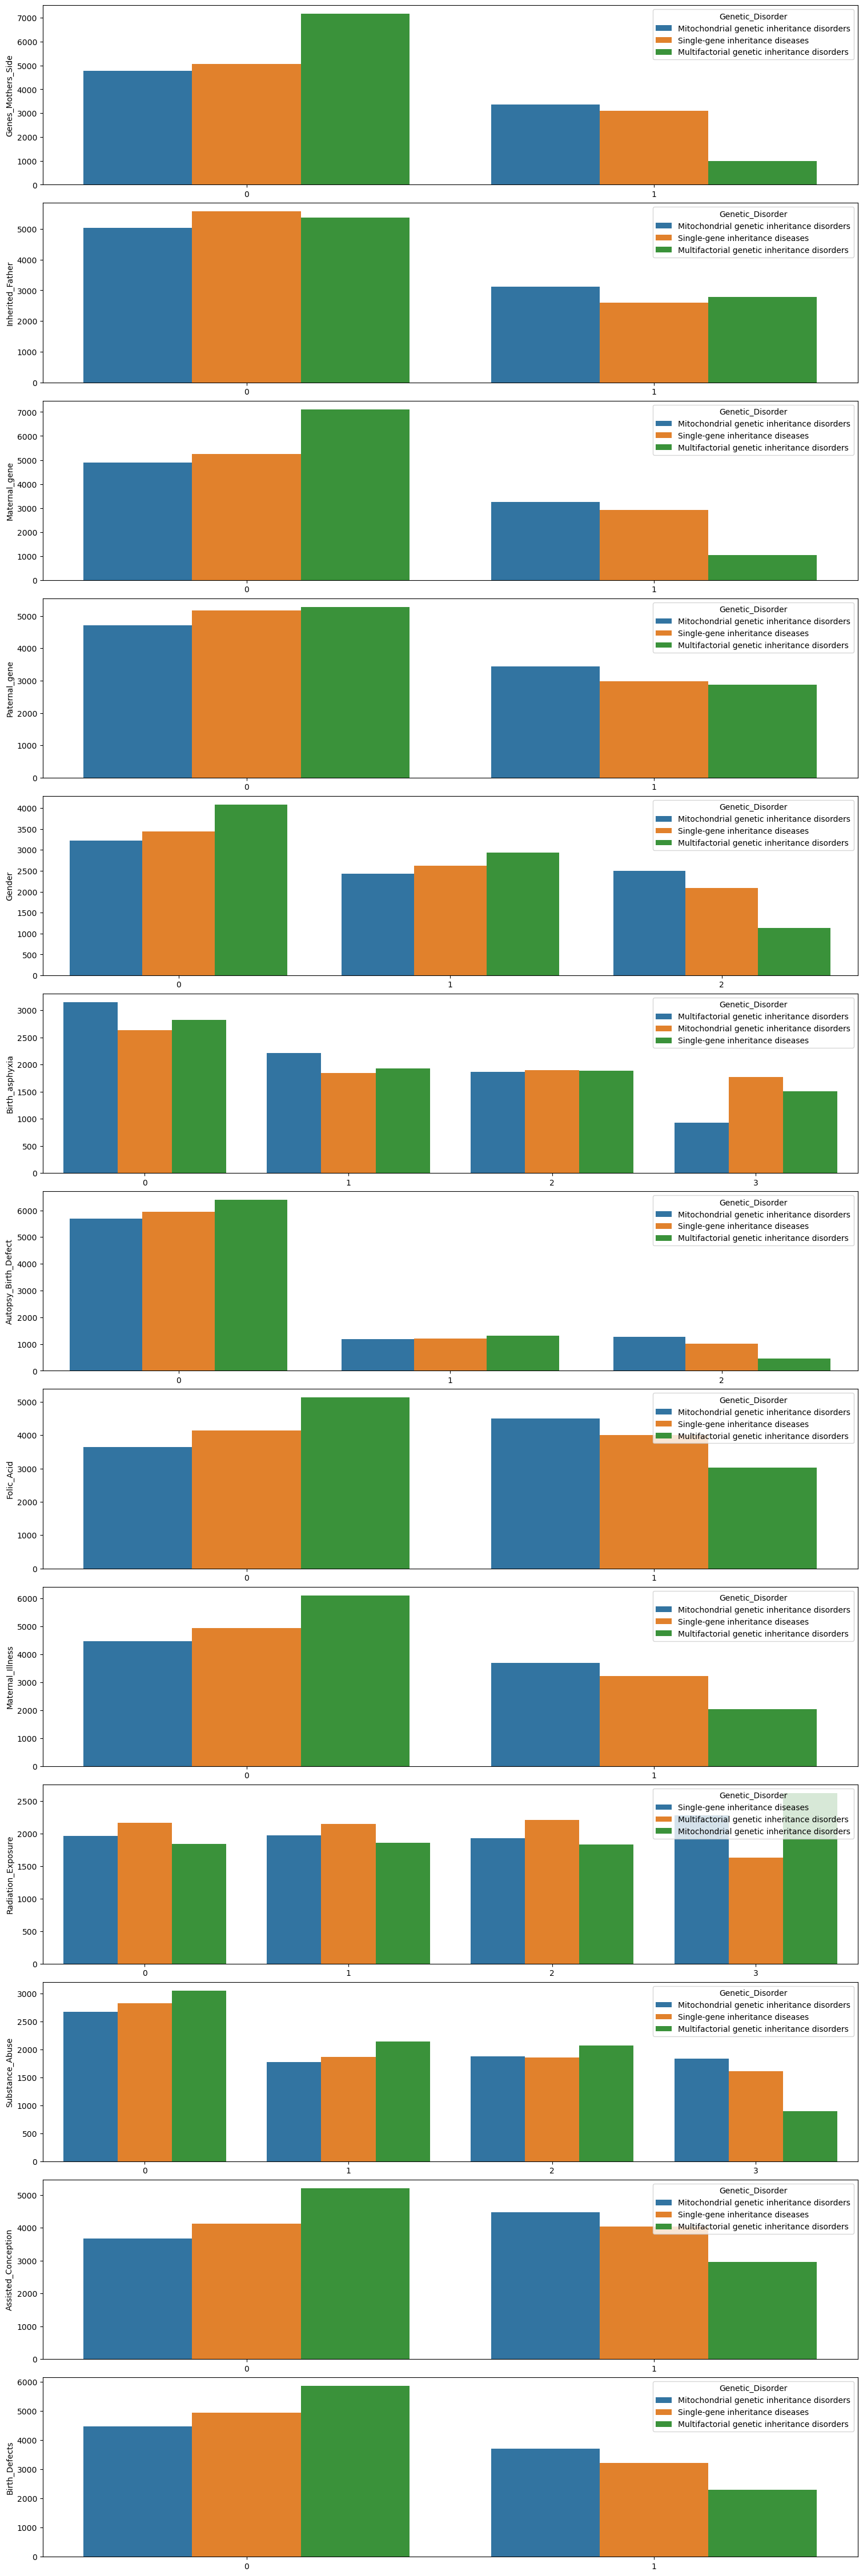

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for plotting
cols = [
    'Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene', 
    'Gender', 'Birth_asphyxia', 'Autopsy_Birth_Defect', 
    'Folic_Acid', 'Maternal_Illness',
    'Radiation_Exposure', 'Substance_Abuse', 
    'Assisted_Conception', 'Birth_Defects'
]

# Create subplots
fig, ax = plt.subplots(len(cols), figsize=(15, 45), constrained_layout=True)

# Plot each categorical column with hue as 'Genetic_Disorder'
for i, var in enumerate(cols): 
    sns.countplot(data=X_train_res_df, x=var, hue='Genetic_Disorder', ax=ax[i], linewidth=1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

# Show the plots
plt.show()
